<a href="https://colab.research.google.com/github/lucasprovenzano/HandsOnMachineLearning/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

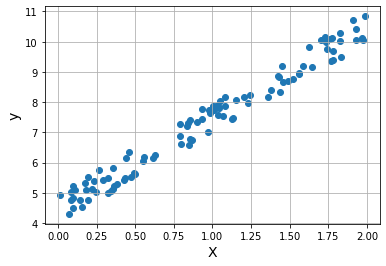

In [2]:
# Linear Regression. 
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X,y)
plt.grid()
plt.ylabel("y", fontsize=14)
plt.xlabel("X", fontsize=14)
plt.show()

In [3]:
# Compute parameters using normal equation. 

X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.4735807 ],
       [3.01434208]])

In [4]:
# Making a prediction fit the calculated parameters. 
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.4735807 ],
       [10.50226486]])

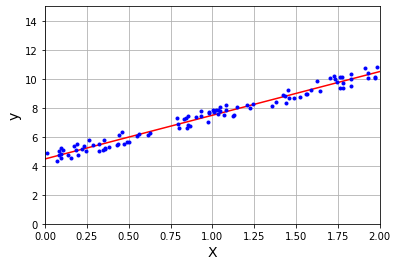

In [5]:
# Plotting the predictions. 
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.ylabel("y", fontsize=14)
plt.xlabel("X", fontsize=14)
plt.show()

In [6]:
# Linear regression using SciKitLearn. 
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print([lin_reg.intercept_, lin_reg.coef_])
lin_reg.predict(X_new)

[array([4.4735807]), array([[3.01434208]])]


array([[ 4.4735807 ],
       [10.50226486]])

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.4735807 ],
       [3.01434208]])

In [8]:
# Calculating pseudo inverse matrix. 
np.linalg.pinv(X_b).dot(y)

array([[4.4735807 ],
       [3.01434208]])

In [9]:
# Gradient descent step. 
eta = 0.1 # learning rate - to find the right LR use grid shearch.  
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization. 
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[4.4735807 ],
       [3.01434208]])

In [10]:
# Stochastic Gradient Decent. 

n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters.

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range (m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta -eta * gradients

theta

array([[4.4800009 ],
       [3.02071266]])

In [11]:
# SGD using SKL. 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.47195195]), array([3.05938174]))

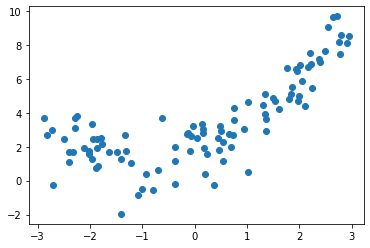

In [13]:
# Polynomial regression. 
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X +2 +np.random.randn(m,1)

plt.scatter(X, y)
plt.show()

In [14]:
# Using SKL polynomial features. 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.24051895])

In [15]:
X_poly[0]

array([2.24051895, 5.01992517])

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.77779446]), array([[1.03503613, 0.50465685]]))

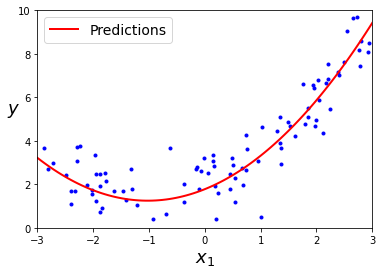

In [17]:
# Making a prediction fit the calculated parameters. 
X_new = np.array([[-3],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b
y_predict = X_new_b.dot(lin_reg.coef_.T) + lin_reg.intercept_


# Plotting the predictions. 
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [18]:
# Plotting learning curves. 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.axis([0, 80, 0, 3])

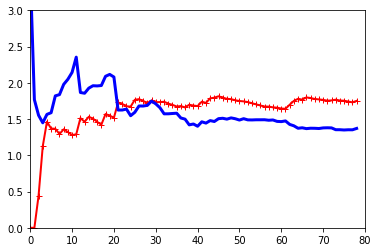

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

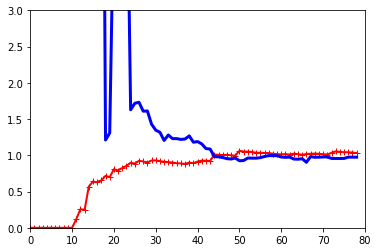

In [20]:
# Polynomial fiting using SKL pipelines. 
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

In [21]:
# Ridge Regression.
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.9013334]])

In [22]:
# Using SGD.
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.87399908])

In [24]:
# Using Lasso Regression. 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.86037307])